# Tutorial to use visualisation tools

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# threshold
H = G.threshold(10)

------------------------------------------------------------------

## *plot_rich_club*
- to plot the rich club values per degree along with the random rich club values created from a random network with a preserved degree distribution

In [2]:
# produce input for the function
# rich_club values are calculated by calling *rich_club* function

from scona.graph_measures import rich_club

rich_club_coefficient = rich_club(H)        # dict of rich_club measures

In [3]:
# make a random rich_club values produced from the random graph

from scona.make_graphs import random_graph

# create empty numpy array for rich_club values of 10 random graphs 
rc_rand = np.ones([len(rich_club_coefficient), 10])

for i in range(10):
    R = random_graph(H)
    
    # Calculate the rich club coefficient
    rc_rand_dict = rich_club(R)

    # And save the values to the numpy array you created earlier
    rc_rand[:, i] = list(rc_rand_dict.values())

# get the average values of 10 random graph's rich club values
random_coef = np.mean(rc_rand, axis=1)

# make a dict of random rich_club values
for key in list(rc_rand_dict.keys()):
    rc_rand_dict[key] = random_coef[key]

In [4]:
# import the function to plot rich club values

from scona.visualisations import plot_rich_club

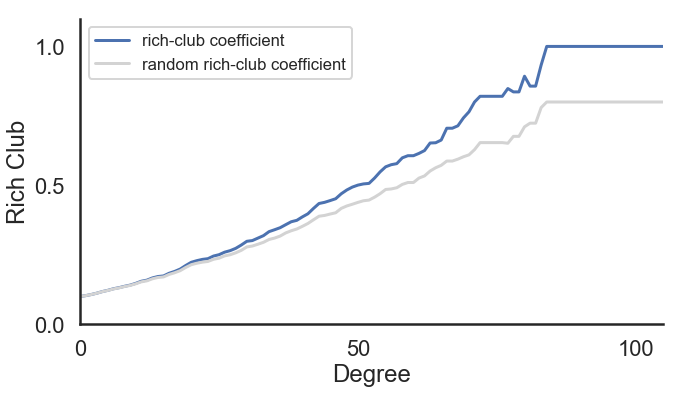

In [5]:
plot_rich_club(rich_club_coefficient, rc_rand_dict, figure_name = "Rich_club_values")

---------------------------------------------------------

## *plot_network_measures* 
- to plot network measures values along with the random network values values created from a random network

In [6]:
# input - *network_measures* is calculated by calling *calculate_global_measures*

from scona.graph_measures import calculate_global_measures
from scona.graph_measures import calc_nodal_partition

In [7]:
# in order to have "modularity" in measures one should calculate nodal partition and pass as an argument
nodal_partition, module_partition = calc_nodal_partition(H)

# calculate network_measures
network_measures = calculate_global_measures(H, nodal_partition)

In [8]:
network_measures

{'assortativity': 0.09076922258276784,
 'average_clustering': 0.4498887255891581,
 'average_shortest_path_length': 2.376242649858285,
 'efficiency': 0.47983958611582617,
 'modularity': 0.3828553111606414}

In [9]:
# create random Graph --> create random network_measures

# create a random graph
from scona.make_graphs import random_graph

RandGraph = random_graph(H)

nodal_partition_rand, module_partition_rand = calc_nodal_partition(RandGraph)

# create random network measures
random_network_measures = calculate_global_measures(RandGraph, nodal_partition_rand)

In [10]:
random_network_measures

{'assortativity': -0.0794982998563659,
 'average_clustering': 0.2236149524850416,
 'average_shortest_path_length': 2.09186090782182,
 'efficiency': 0.5182554958614368,
 'modularity': 0.13093274559022677}

In [11]:
# import the function to plot network measures values

from scona.visualisations import plot_network_measures

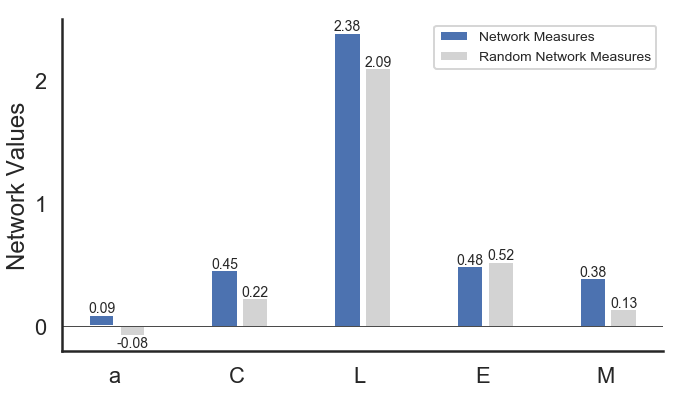

In [12]:
plot_network_measures(network_measures, random_network_measures, figure_name="Network Measures")

----------------------

## *plot_degree_dist*
- to plot the degree distribution along with the degree distribution of an Erdos Renyi random graph that has the same number of nodes

In [13]:
# import the function to plot the degree distribution

from scona.visualisations import plot_degree_dist

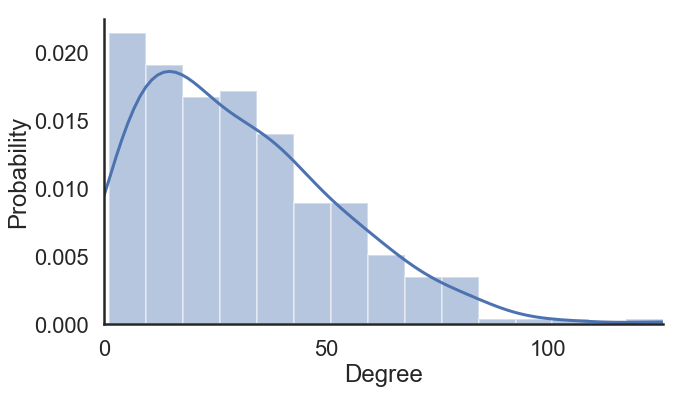

In [14]:
plot_degree_dist(H, binomial_graph=False, figure_name="Degree Distribution")